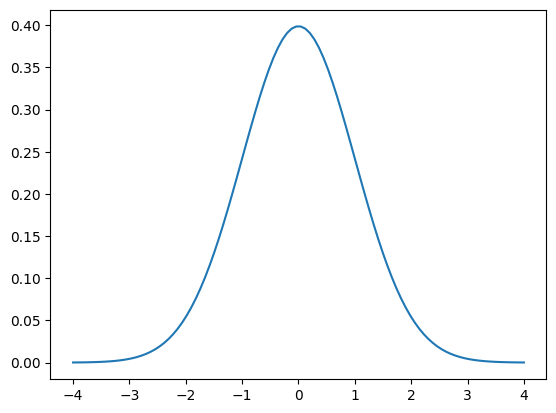

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1))

(array([2.000000e+00, 1.300000e+01, 1.050000e+02, 6.210000e+02,
        3.312000e+03, 1.457700e+04, 5.222700e+04, 1.537460e+05,
        3.723440e+05, 7.389360e+05, 1.205616e+06, 1.614785e+06,
        1.772284e+06, 1.600010e+06, 1.183330e+06, 7.175360e+05,
        3.580930e+05, 1.463190e+05, 4.911600e+04, 1.336600e+04,
        3.027000e+03, 5.440000e+02, 7.400000e+01, 1.500000e+01,
        2.000000e+00]),
 array([-5.59521121, -5.14674373, -4.69827625, -4.24980877, -3.8013413 ,
        -3.35287382, -2.90440634, -2.45593886, -2.00747139, -1.55900391,
        -1.11053643, -0.66206895, -0.21360148,  0.234866  ,  0.68333348,
         1.13180095,  1.58026843,  2.02873591,  2.47720339,  2.92567086,
         3.37413834,  3.82260582,  4.2710733 ,  4.71954077,  5.16800825,
         5.61647573]),
 <BarContainer object of 25 artists>)

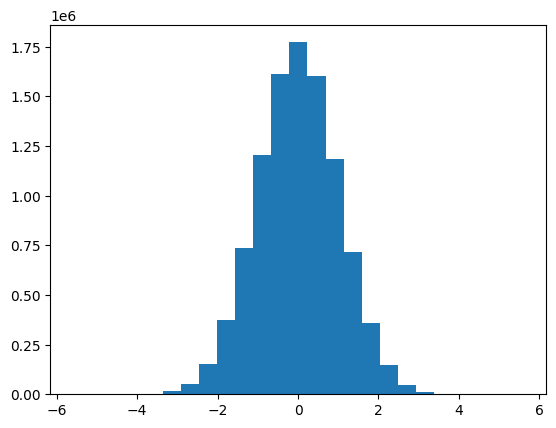

In [2]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(12345)
data = rng.normal(size=10000000)
plt.hist(data, bins=25)

In [3]:
min(data), max(data)

(-5.595211205126916, 5.61647572810784)

In [4]:
import numpy as np

normal_data = rng.uniform(0, 1, 1000)

(array([ 95., 106.,  89., 107.,  95., 121.,  92., 100., 100.,  95.]),
 array([8.86092447e-04, 1.00685487e-01, 2.00484882e-01, 3.00284276e-01,
        4.00083671e-01, 4.99883065e-01, 5.99682460e-01, 6.99481854e-01,
        7.99281249e-01, 8.99080643e-01, 9.98880038e-01]),
 <BarContainer object of 10 artists>)

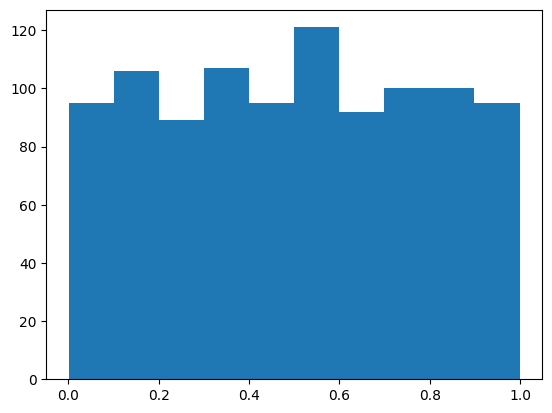

In [5]:
import matplotlib.pyplot as plt

plt.hist(normal_data)

In [6]:
hard_to_detect = list(rng.uniform(1, 2, size=int(0.005 * 1000))) + list(
    rng.uniform(-1, 0, size=int(0.005 * 1000))
)

easy_to_detect = list(rng.uniform(2, 3, size=int(0.005 * 1000))) + list(
    rng.uniform(-3, -2, size=int(0.005 * 1000))
)

In [7]:
total_data = list(normal_data) + hard_to_detect + easy_to_detect

import random

random.shuffle(total_data)

for datapoint in total_data:
    pass

In [8]:
# Anomaly percentage for the quantile thresholder
expected_percentage_anomaly = 20 / 1020
expected_percentage_normal = 1 - expected_percentage_anomaly

In [9]:
!pip install river
from river import anomaly

model = anomaly.QuantileFilter(anomaly.OneClassSVM(), q=expected_percentage_normal)

for datapoint in total_data:
    model = model.learn_one({"x": datapoint})

In [10]:
is_anomaly = []
for datapoint in total_data:
    score = model.score_one({"x": datapoint})
    is_anomaly.append(model.classify(score))

In [11]:
import pandas as pd

results = pd.DataFrame({"data": total_data, "is_anomaly": is_anomaly})
results["actual_outlier"] = (results["data"] > 1) | (results["data"] < 0)

# there are 20 actual outliers
results["actual_outlier"].value_counts()

False    1000
True       20
Name: actual_outlier, dtype: int64

In [12]:
# the algo detected 9 outliers
results["is_anomaly"].value_counts()

False    1011
True        9
Name: is_anomaly, dtype: int64

In [13]:
# in the 9 detected otuliuers, they're all actual outliers
results.groupby("actual_outlier")["is_anomaly"].sum()

actual_outlier
False    0
True     9
Name: is_anomaly, dtype: int64

In [14]:
from river import anomaly

model2 = anomaly.QuantileFilter(anomaly.HalfSpaceTrees(), q=expected_percentage_normal)

for datapoint in total_data:
    model2 = model2.learn_one({"x": datapoint})


is_anomaly2 = []
for datapoint in total_data:
    score = model2.score_one({"x": datapoint})
    is_anomaly2.append(model2.classify(score))

import pandas as pd

results2 = pd.DataFrame({"data": total_data, "is_anomaly": is_anomaly2})
results2["actual_outlier"] = (results2["data"] > 1) | (results2["data"] < 0)

# there are 20 actual outliers
results2["actual_outlier"].value_counts()

False    1000
True       20
Name: actual_outlier, dtype: int64

In [15]:
# the algo detected 52 outliers
results2["is_anomaly"].value_counts()

False    968
True      52
Name: is_anomaly, dtype: int64

In [16]:
# the 42 detected outliers are not actually outliers
results2.groupby("actual_outlier")["is_anomaly"].sum()

actual_outlier
False    42
True     10
Name: is_anomaly, dtype: int64